In [73]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [74]:
#Reading the train dataset
train_df=pd.read_csv("train_PDjVQMB.csv")
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [76]:
#Check whether there are missing values in the train data

train_df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [77]:
#Reading the Test dataset
test_df=pd.read_csv("test_lTY72QC.csv")
test_df.tail()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor
2850,36b81f59,61,Female,10L - 15L,913787.73,0,1,2,1,Good


In [78]:
#Performing data preprocessing on both the train and test datsets
final_df=final_df=train_df.append(test_df)

In [79]:
# Converting the "Gender" categorical variable to numeric value
df1=pd.get_dummies(final_df['Gender'])
df1.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [80]:
final_df=pd.concat([df1,final_df],axis=1)

In [81]:
final_df.drop('Gender',axis=1,inplace=True)

In [10]:
final_df.head()

,Female,Male,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,1,0,84e2fcc9,36,5L - 10L,563266.44,4,0,1,0,Average,1.0
1,1,0,57fea15e,53,Less than 5L,875572.11,2,1,1,1,Poor,0.0
2,1,0,8df34ef3,35,More than 15L,701607.06,2,1,2,0,Poor,0.0
3,1,0,c5c0788b,43,More than 15L,1393922.16,0,1,2,1,Poor,1.0
4,1,0,951d69c4,39,More than 15L,893146.23,1,1,1,1,Good,1.0


In [82]:
final_df['Income'].unique()

array(['5L - 10L', 'Less than 5L', 'More than 15L', '10L - 15L'],
      dtype=object)

In [83]:
#Perform label encoding on the feature Income 
final_df['Income']=final_df['Income'].map({'Less than 5L':0,'5L - 10L':1,'10L - 15L':2,'More than 15L':3})
final_df.head()

,Female,Male,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,1,0,84e2fcc9,36,1,563266.44,4,0,1,0,Average,1.0
1,1,0,57fea15e,53,0,875572.11,2,1,1,1,Poor,0.0
2,1,0,8df34ef3,35,3,701607.06,2,1,2,0,Poor,0.0
3,1,0,c5c0788b,43,3,1393922.16,0,1,2,1,Poor,1.0
4,1,0,951d69c4,39,3,893146.23,1,1,1,1,Good,1.0


In [84]:
final_df['Credit_Category'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [85]:
#Perform label encoding on the feature Credit Category
final_df['Credit_Category']=final_df['Credit_Category'].map({'Poor':0,'Average':1,'Good':2})
final_df.head()

,Female,Male,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,1,0,84e2fcc9,36,1,563266.44,4,0,1,0,1,1.0
1,1,0,57fea15e,53,0,875572.11,2,1,1,1,0,0.0
2,1,0,8df34ef3,35,3,701607.06,2,1,2,0,0,0.0
3,1,0,c5c0788b,43,3,1393922.16,0,1,2,1,0,1.0
4,1,0,951d69c4,39,3,893146.23,1,1,1,1,2,1.0


In [86]:
#Perform label encoding on the featureProduct Holdings
final_df['Product_Holdings'].unique()
final_df['Product_Holdings']=final_df['Product_Holdings'].map({'1':1,'2':2,'3+':3})

In [87]:
#Dividing the final_df back to train and test sets
train_df=final_df[0:6650]
train_df.shape


(6650, 12)

In [88]:
train_df.tail()

,Female,Male,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
6645,0,1,a8216afd,61,1,1354526.19,4,1,2,1,0,1.0
6646,1,0,153a306b,42,1,596286.54,3,1,2,1,1,0.0
6647,0,1,d4075a95,29,0,979298.19,2,0,2,0,0,0.0
6648,1,0,5855b142,66,2,395233.65,3,0,2,1,0,1.0
6649,0,1,57b39511,37,3,826947.27,1,1,2,0,2,0.0


In [89]:
test_df=final_df[6650:]
test_df.head()

,Female,Male,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,1,0,55480787,50,3,1008636.39,2,1,2,1,1,NaN
1,0,1,9aededf2,36,1,341460.72,2,0,2,1,1,NaN
2,1,0,a5034a09,25,2,439460.10,0,0,2,1,2,NaN
3,0,1,b3256702,41,0,28581.93,0,1,2,1,0,NaN
4,0,1,dc28adb5,48,3,1104540.03,2,1,3,0,2,NaN


<AxesSubplot:>

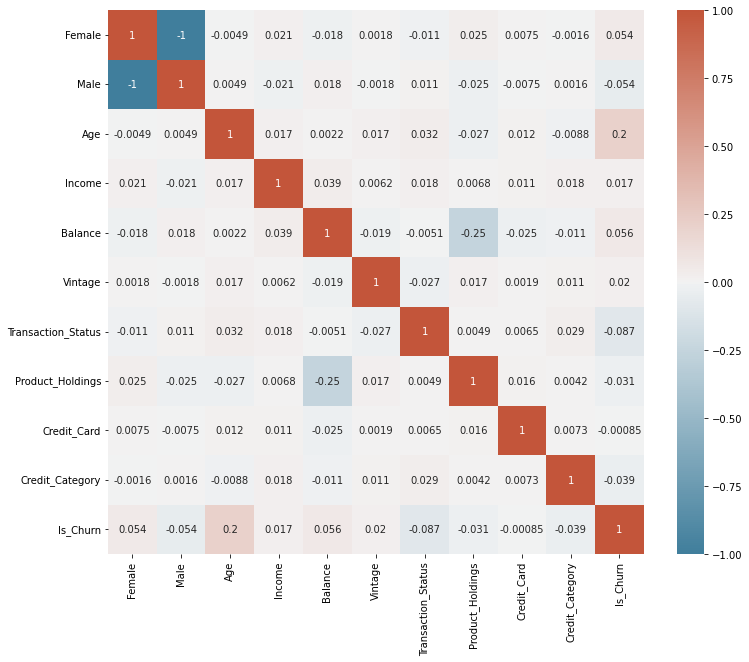

In [19]:
#Plotting a Heatmap to identify the correlation between the independant features and the dependant feature
corr = train_df.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap=cmap)

From the heatmap we can observer that 'Age' is the independant feature which is the most correlated to the dependant 'Is_Churn' feature.

In [90]:
X = np.asarray(train_df[['Age', 'Income', 'Balance','Male','Female','Vintage','Transaction_Status','Product_Holdings','Credit_Card','Credit_Category']])
X[0:5]

array([[3.60000000e+01, 1.00000000e+00, 5.63266440e+05, 0.00000000e+00,
        1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [5.30000000e+01, 0.00000000e+00, 8.75572110e+05, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.50000000e+01, 3.00000000e+00, 7.01607060e+05, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.30000000e+01, 3.00000000e+00, 1.39392216e+06, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.90000000e+01, 3.00000000e+00, 8.93146230e+05, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 2.00000000e+00]])

In [91]:
y = np.asarray(train_df['Is_Churn'])
y [0:5]

array([1., 0., 0., 1., 1.])

In [92]:
#Normalizing the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.52970736, -0.42556653, -0.46794917, -1.0903853 ,  1.0903853 ,
         1.19955573, -1.03209369, -0.97755572, -1.4069082 ,  0.29068519],
       [ 1.22558098, -1.3682772 ,  0.13762758, -1.0903853 ,  1.0903853 ,
        -0.17154183,  0.96890428, -0.97755572,  0.71077843, -0.96048408],
       [-0.63295962,  1.45985481, -0.1996996 , -1.0903853 ,  1.0903853 ,
        -0.17154183,  0.96890428,  0.77089655, -1.4069082 , -0.96048408],
       [ 0.19305843,  1.45985481,  1.14273497, -1.0903853 ,  1.0903853 ,
        -1.54263939,  0.96890428,  0.77089655,  0.71077843, -0.96048408],
       [-0.21995059,  1.45985481,  0.1717047 , -1.0903853 ,  1.0903853 ,
        -0.85709061,  0.96890428, -0.97755572,  0.71077843,  1.54185447]])

In [23]:
#Performing auto-resampling on the train dataset since it is imbalanced i.e; the positive cases are higher than the negative cases
from imblearn.over_sampling import SMOTE
method = SMOTE(sampling_strategy='auto')


In [24]:
X_resampled, y_resampled = method.fit_resample(X, y)

In [93]:
#Cross validation using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4655, 10) (4655,)
Test set: (1995, 10) (1995,)


In [94]:
#Using Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [95]:
yhat = LR.predict(X_test)
yhat[0:5]

array([0., 0., 1., 0., 0.])

In [96]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.79421171, 0.20578829],
       [0.82453239, 0.17546761],
       [0.49613026, 0.50386974],
       ...,
       [0.715584  , 0.284416  ],
       [0.84476416, 0.15523584],
       [0.82400535, 0.17599465]])

In [97]:
from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='macro'))

0.483631170551854


In [98]:
#Using SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [99]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0., 0., 0., 0., 0.])

In [100]:
print(f1_score(y_test, yhat, average='macro'))

0.43834459459459457


In [101]:
#Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [102]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 0., 0.])

In [103]:
print(f1_score(y_test, yhat, average='macro'))

0.5163972607501651


In [104]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [105]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [106]:
yhat = drugTree.predict(X_test)
yhat[0:5]

array([0., 1., 1., 0., 0.])

In [107]:
print(f1_score(y_test, yhat, average='macro'))

0.5315996730812096


In [40]:
#Using random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 15, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [41]:
yhat = classifier.predict(X_test)
yhat[0:5]

array([0., 0., 1., 1., 0.])

In [42]:
print(f1_score(y_test, yhat, average='macro'))

0.5146160794941282


We found upon cross-validation on the train data that Decision Tree classifier is performing the best with macro F1-Score of "0.5315996730812096".
Hence we'll be using the Decision Tree classifier to make predictions to the test data

In [108]:
df=test_df[['Age', 'Income', 'Balance','Male','Female','Vintage','Transaction_Status','Product_Holdings','Credit_Card','Credit_Category']]
df.head()

,Age,Income,Balance,Male,Female,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,3,1008636.39,0,1,2,1,2,1,1
1,36,1,341460.72,1,0,2,0,2,1,1
2,25,2,439460.10,0,1,0,0,2,1,2
3,41,0,28581.93,1,0,0,1,2,1,0
4,48,3,1104540.03,1,0,2,1,3,0,2


In [113]:
#Normalizing the test data
from sklearn import preprocessing
df = preprocessing.StandardScaler().fit(df).transform(df)
df[0:5]

array([[ 0.90980187,  1.46366172,  0.37846945, -1.08765874,  1.08765874,
        -0.1483373 ,  0.98641289,  0.70821668,  0.70357541,  0.23992029],
       [-0.54624592, -0.44351358, -0.89207963,  0.91940603, -0.91940603,
        -0.1483373 , -1.01377427,  0.70821668,  0.70357541,  0.23992029],
       [-1.69028347,  0.51007407, -0.70545259, -1.08765874,  1.08765874,
        -1.49090762, -1.01377427,  0.70821668,  0.70357541,  1.47237572],
       [-0.02622885, -1.39710124, -1.48791649,  0.91940603, -0.91940603,
        -1.49090762,  0.98641289,  0.70821668,  0.70357541, -0.99253513],
       [ 0.70179504,  1.46366172,  0.56110543,  0.91940603, -0.91940603,
        -0.1483373 ,  0.98641289,  2.40211413, -1.42131176,  1.47237572]])

In [114]:
df= np.asarray(df)
df [0:5]

array([[ 0.90980187,  1.46366172,  0.37846945, -1.08765874,  1.08765874,
        -0.1483373 ,  0.98641289,  0.70821668,  0.70357541,  0.23992029],
       [-0.54624592, -0.44351358, -0.89207963,  0.91940603, -0.91940603,
        -0.1483373 , -1.01377427,  0.70821668,  0.70357541,  0.23992029],
       [-1.69028347,  0.51007407, -0.70545259, -1.08765874,  1.08765874,
        -1.49090762, -1.01377427,  0.70821668,  0.70357541,  1.47237572],
       [-0.02622885, -1.39710124, -1.48791649,  0.91940603, -0.91940603,
        -1.49090762,  0.98641289,  0.70821668,  0.70357541, -0.99253513],
       [ 0.70179504,  1.46366172,  0.56110543,  0.91940603, -0.91940603,
        -0.1483373 ,  0.98641289,  2.40211413, -1.42131176,  1.47237572]])

In [115]:
#Making the predictions using Decision Tree classifier model
yhat = drugTree.predict(df)

In [116]:
new_df = pd.DataFrame(yhat,columns = ['Is_Churn'])
new_df['ID']=test_df['ID']
new_df=new_df.reindex(columns=['ID','Is_Churn'])
new_df.head(30)


,ID,Is_Churn
0,55480787,0.0
1,9aededf2,0.0
2,a5034a09,0.0
3,b3256702,0.0
4,dc28adb5,1.0
5,5aee459a,0.0
6,3e83f7ea,0.0
7,ed4dfbd0,1.0
8,3911bea6,0.0
9,e04eff55,0.0


In [120]:
#Writing the output to a .csv file
new_df.to_csv('sample_output.csv',index=False)